## Question 1: Principal Component Analysis

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB
%matplotlib inline

## 1. Converting the data into readable format

In [2]:
df1 = pd.read_csv('anneal.data')
df2 = pd.read_csv('anneal.test')
f = open('anneal.names','r')

In [3]:
df2

,?,C,A,00,45,?.1,S,?.2,000,?.3,...,?.22,?.23,COIL,1.600,0610.0,0000,?.24,0000.1,?.25,3
0,?,C,A,0,0,?,S,3,0,N,...,?,?,COIL,0.699,609.9,0,?,0,?,3
1,ZS,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
2,ZS,C,A,0,50,T,?,?,0,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
3,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
4,TN,C,?,0,0,?,A,1,0,?,...,?,?,COIL,0.800,50.0,0,?,0,?,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.599,610.0,762,?,0,?,2
95,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.601,830.0,880,?,0,?,2
96,?,C,V,0,0,?,S,2,0,?,...,?,?,SHEET,1.599,150.0,762,?,0,?,2
97,?,C,A,0,85,T,?,?,0,?,...,?,?,COIL,0.400,20.0,0,?,0,?,U


In [4]:
(df1.columns)

Index(['?', 'C', 'A', '08', '00', '?.1', 'S', '?.2', '000', '?.3', '?.4', 'G',
       '?.5', '?.6', '?.7', '?.8', '?.9', '?.10', '?.11', '?.12', '?.13',
       '?.14', '?.15', '?.16', '?.17', '?.18', '?.19', '?.20', '?.21', '?.22',
       '?.23', 'COIL', '0.700', '0610.0', '0000', '?.24', '0000.1', '?.25',
       '3'],
      dtype='object')

## 2. Preprocessing the data

In [5]:
cols = ['family',
 'product-type',
 'steel',
 'carbon',
 'hardness',
 'temper_rolling',
 'condition',
 'formability',
 'strength',
 'non-ageing',
 'surface-finish',
 'surface-quality',
 'enamelability',
 'bc',
 'bf',
 'bt',
 'bw/me',
 'bl',
 'm',
 'chrom',
 'phos',
 'cbond',
 'marvi',
 'exptl',
 'ferro',
 'corr',
 'blue/bright/varn/clean',
 'lustre',
 'jurofm',
 's',
 'p',
 'shape',
 'thick',
 'width',
 'len',
 'oil',
 'bore',
 'packing',
 'class']

In [6]:
df1.columns = cols

In [7]:
df2.columns = cols

In [8]:
df = pd.concat([df1, df2])

In [9]:
df.reset_index(inplace = True, drop=True)
df

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,class
0,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
2,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
4,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.599,610.0,762,?,0,?,2
892,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.601,830.0,880,?,0,?,2
893,?,C,V,0,0,?,S,2,0,?,...,?,?,SHEET,1.599,150.0,762,?,0,?,2
894,?,C,A,0,85,T,?,?,0,?,...,?,?,COIL,0.400,20.0,0,?,0,?,U


In [10]:
print("Missing Values are:")
droppingColumns = []
for ci, column in enumerate(cols):
    count = 0
    for j in range(len(df)):
        if(df.iloc[j, ci]=='?'):
            count+=1
    if(count>=240):
        droppingColumns.append(column)
    print(column, "------>", count)

Missing Values are:
family ------> 770
product-type ------> 0
steel ------> 86
carbon ------> 0
hardness ------> 0
temper_rolling ------> 759
condition ------> 303
formability ------> 316
strength ------> 0
non-ageing ------> 791
surface-finish ------> 887
surface-quality ------> 244
enamelability ------> 880
bc ------> 895
bf ------> 767
bt ------> 822
bw/me ------> 685
bl ------> 747
m ------> 896
chrom ------> 870
phos ------> 889
cbond ------> 822
marvi ------> 896
exptl ------> 894
ferro ------> 866
corr ------> 896
blue/bright/varn/clean ------> 890
lustre ------> 845
jurofm ------> 896
s ------> 896
p ------> 896
shape ------> 0
thick ------> 0
width ------> 0
len ------> 0
oil ------> 832
bore ------> 0
packing ------> 887
class ------> 0


In [11]:
df.drop(droppingColumns, axis=1, inplace = True)

In [12]:
df.head()

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,C,R,0,0,0,COIL,3.200,610.0,0,0,3
1,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
2,C,A,0,60,0,COIL,2.801,385.1,0,0,3
3,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
4,C,A,0,45,0,COIL,1.600,610.0,0,0,3


In [13]:
print('Missing Values: ')
droppingColumns = []
for ci,column in enumerate(df.columns):
    count = 0
    for j in range(len(df)):
        if df.iloc[j , ci] == '?':
            count += 1
    if count > 1:
        droppingColumns.append(column)
    print(column, '===>', count)

Missing Values: 
product-type ===> 0
steel ===> 86
carbon ===> 0
hardness ===> 0
strength ===> 0
shape ===> 0
thick ===> 0
width ===> 0
len ===> 0
bore ===> 0
class ===> 0


In [14]:
for ji, j in enumerate(df['steel']):
    if j == '?':
        df.drop(ji,inplace = True)

In [15]:
df.reset_index(inplace = True , drop = True)

In [16]:
print('Unique Values')
for i in df.columns:
    print(i ,'==>' ,df[i].nunique() )

Unique Values
product-type ==> 1
steel ==> 7
carbon ==> 10
hardness ==> 7
strength ==> 8
shape ==> 2
thick ==> 49
width ==> 67
len ==> 22
bore ==> 3
class ==> 5


In [17]:
df.drop(['product-type'] , inplace = True, axis = 1)
df

,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,R,0,0,0,COIL,3.200,610.0,0,0,3
1,R,0,0,0,SHEET,0.700,1300.0,762,0,3
2,A,0,60,0,COIL,2.801,385.1,0,0,3
3,A,0,60,0,SHEET,0.801,255.0,269,0,3
4,A,0,45,0,COIL,1.600,610.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...
805,R,0,0,0,SHEET,1.599,610.0,762,0,2
806,R,0,0,0,SHEET,1.601,830.0,880,0,2
807,V,0,0,0,SHEET,1.599,150.0,762,0,2
808,A,0,85,0,COIL,0.400,20.0,0,0,U


In [18]:
def encode(df, colums):
    for col in colums:
        dic = {}
        count = 0
        for ji,j in enumerate(df[col]):
            if j not in dic:
                dic[j] = count
                df.loc[ji, col] = dic[j]
                count += 1
            else:
                df.loc[ji, col] = dic[j]
    return df

In [19]:
df = encode(df, ['shape','bore','class','steel'])

In [20]:
df['shape'] = df['shape'].astype('int64')

In [21]:
df['class'] = df['class'].astype('int64')

In [22]:
df['steel'] = df['steel'].astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   steel     810 non-null    int64  
 1   carbon    810 non-null    int64  
 2   hardness  810 non-null    int64  
 3   strength  810 non-null    int64  
 4   shape     810 non-null    int64  
 5   thick     810 non-null    float64
 6   width     810 non-null    float64
 7   len       810 non-null    int64  
 8   bore      810 non-null    int64  
 9   class     810 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 63.4 KB


C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Kartik\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  

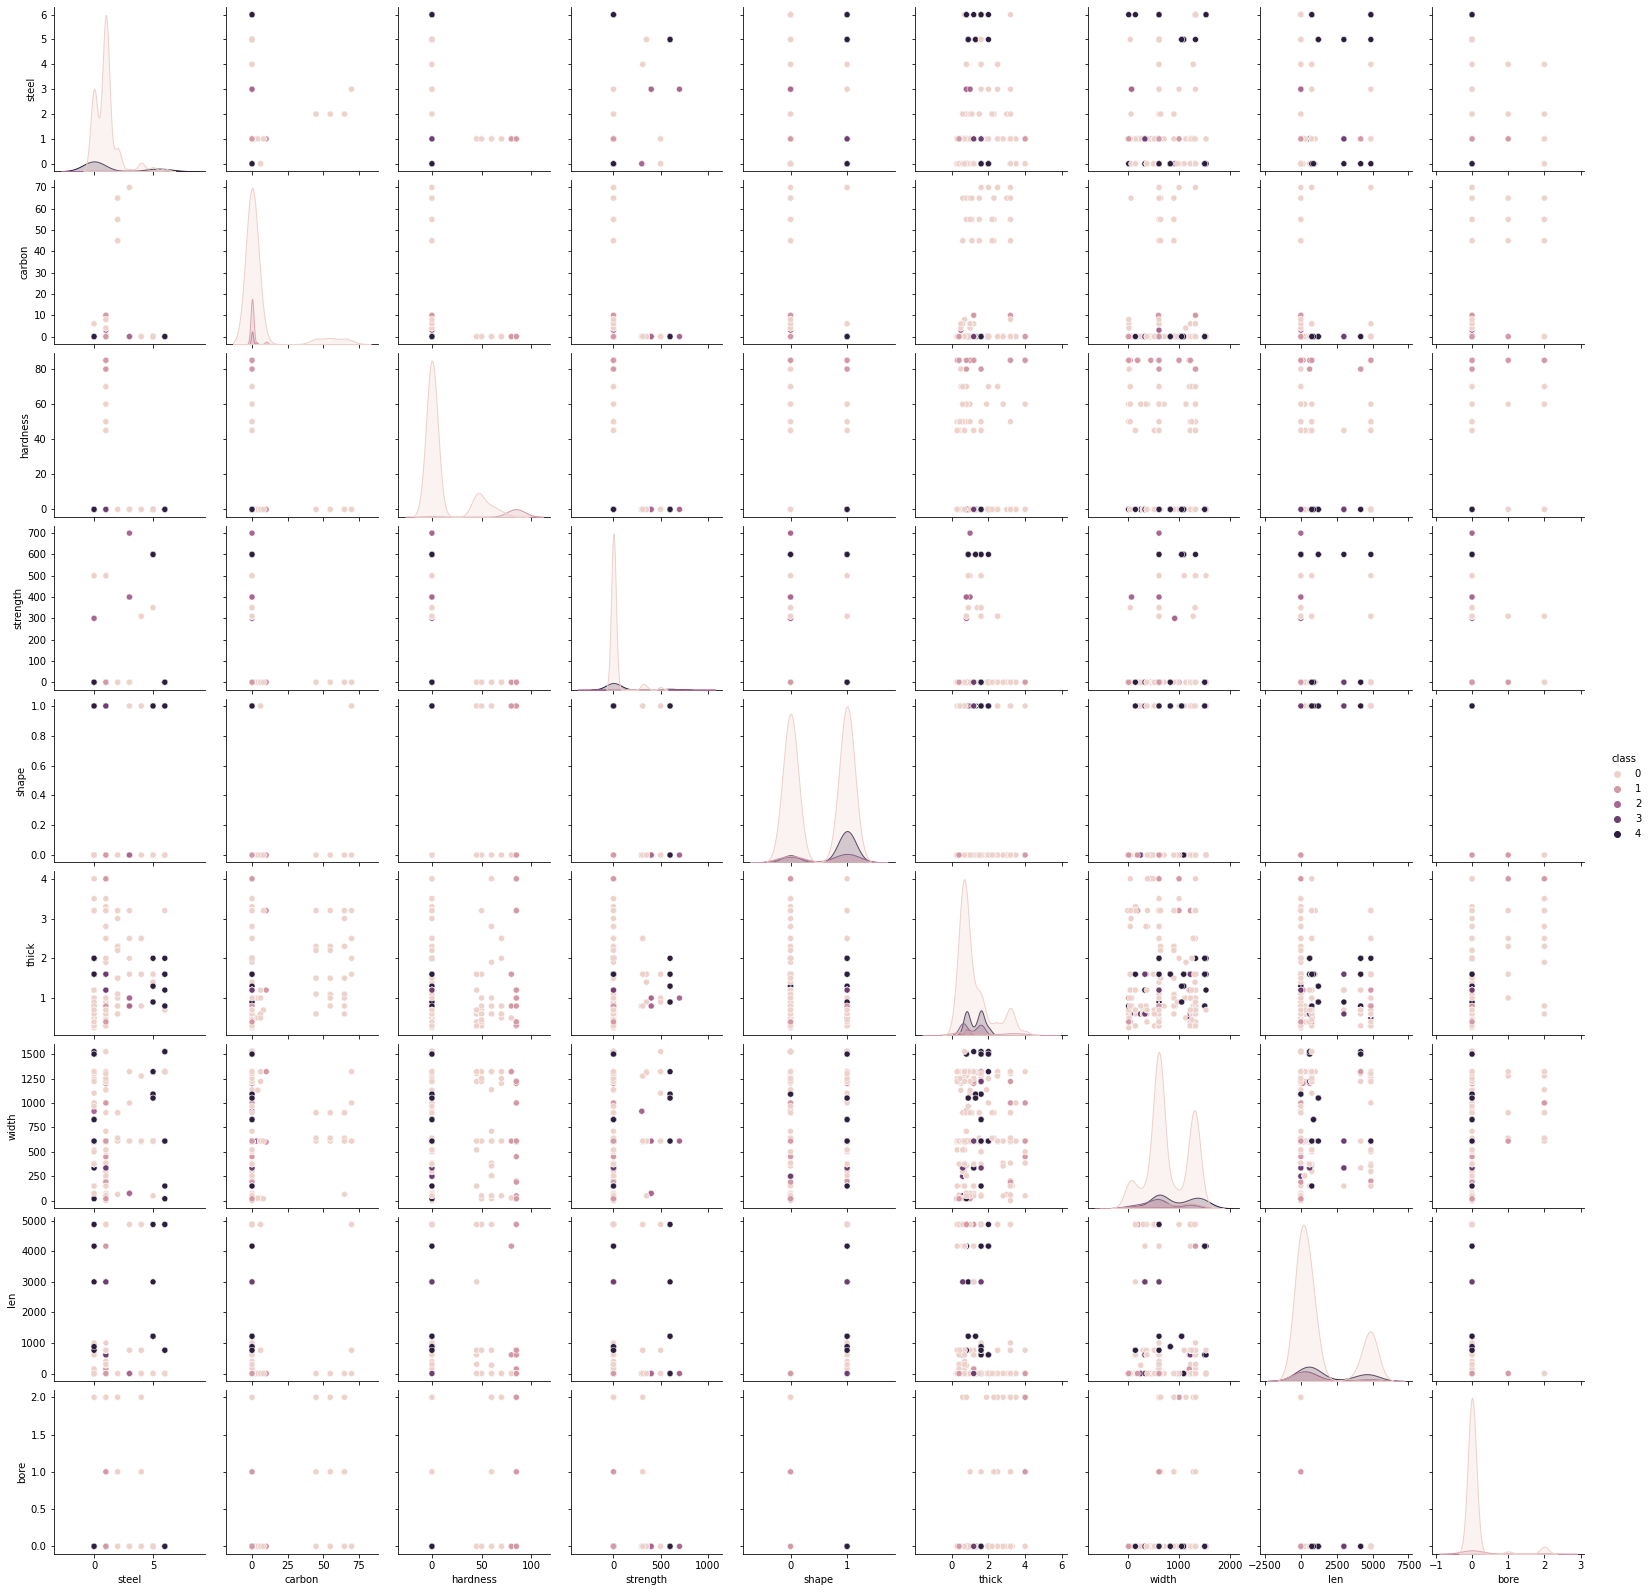

In [102]:
sns.pairplot(df,hue="class")

In [24]:
df

,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
0,0,0,0,0,0,3.200,610.0,0,0,0
1,0,0,0,0,1,0.700,1300.0,762,0,0
2,1,0,60,0,0,2.801,385.1,0,0,0
3,1,0,60,0,1,0.801,255.0,269,0,0
4,1,0,45,0,0,1.600,610.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
805,0,0,0,0,1,1.599,610.0,762,0,4
806,0,0,0,0,1,1.601,830.0,880,0,4
807,6,0,0,0,1,1.599,150.0,762,0,4
808,1,0,85,0,0,0.400,20.0,0,0,1


In [25]:
df.describe()

,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,1.039506,4.019753,11.876543,29.061728,0.541975,1.226302,787.196049,1276.011111,0.090123,0.696296
std,1.236415,14.388383,24.967164,111.259154,0.498543,0.876360,403.311681,1883.008826,0.398422,1.391875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.699000,609.900000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.800000,610.000000,612.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.600000,1250.000000,762.000000,0.000000,0.000000
max,6.000000,70.000000,85.000000,700.000000,1.000000,4.000000,1525.000000,4880.000000,2.000000,4.000000


## splitting the dataset

In [26]:
X = np.array(df.iloc[:, 0:-1])
y = np.array(df.iloc[:, -1])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state = 12)

#  3. Training on Three different models :
## Model1 = Decision Tree Classifier

In [28]:
m1 = DecisionTreeClassifier()

In [29]:
m1_score  =  cross_val_score(m1, X, y, cv=5)

In [30]:
fold = [1, 2, 3, 4, 5]

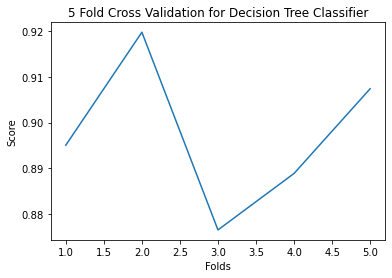

In [31]:
plt.title("5 Fold Cross Validation for Decision Tree Classifier") 
plt.xlabel("Folds") 
plt.ylabel("Score") 
plt.plot(fold, m1_score) 

## Model2 = Gaussian Classifier

In [32]:
m2 = GaussianNB()

In [33]:
m2_score  =  cross_val_score(m2, X, y, cv=5)

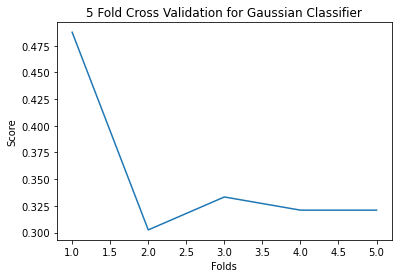

In [34]:
plt.title("5 Fold Cross Validation for Gaussian Classifier") 
plt.xlabel("Folds") 
plt.ylabel("Score") 
plt.plot(fold, m2_score) 

## Model3 = Multinomial Classifier

In [35]:
m3 = MultinomialNB()

In [36]:
m3_score = cross_val_score(m3, X, y, cv=5)

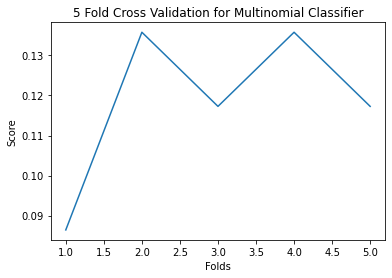

In [37]:
plt.title("5 Fold Cross Validation for Multinomial Classifier") 
plt.xlabel("Folds") 
plt.ylabel("Score") 
plt.plot(fold, m3_score) 

## Five Fold Cross-Validation of the above models

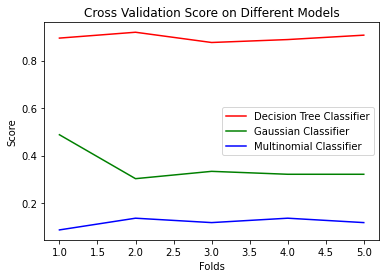

In [38]:
plt.plot(fold, m1_score, color='r', label='Decision Tree Classifier')
plt.plot(fold, m2_score, color='g', label='Gaussian Classifier')
plt.plot(fold, m3_score, color='b', label='Multinomial Classifier')
plt.xlabel("Folds")
plt.ylabel("Score")
plt.title("Cross Validation Score on Different Models")
plt.legend()
plt.show()

# 4. Implementing the Principal Component Analysis

In [39]:
df.corr()

,steel,carbon,hardness,strength,shape,thick,width,len,bore,class
steel,1.000000,0.228623,-0.015218,0.514341,-0.139056,0.071172,0.035510,-0.110477,0.078078,0.064442
carbon,0.228623,1.000000,-0.133059,-0.073065,-0.248602,0.205511,-0.015355,-0.148672,0.245068,-0.138327
hardness,-0.015218,-0.133059,1.000000,-0.124406,-0.123022,0.012161,-0.043400,-0.093628,0.151974,-0.123903
strength,0.514341,-0.073065,-0.124406,1.000000,-0.085532,0.055831,0.075212,-0.064237,-0.007292,0.126190
shape,-0.139056,-0.248602,-0.123022,-0.085532,1.000000,-0.178263,0.178225,0.623340,-0.246211,0.168027
thick,0.071172,0.205511,0.012161,0.055831,-0.178263,1.000000,0.006964,-0.096215,0.395413,0.017049
width,0.035510,-0.015355,-0.043400,0.075212,0.178225,0.006964,1.000000,0.124311,0.028150,0.044383
len,-0.110477,-0.148672,-0.093628,-0.064237,0.623340,-0.096215,0.124311,1.000000,-0.153473,0.062993
bore,0.078078,0.245068,0.151974,-0.007292,-0.246211,0.395413,0.028150,-0.153473,1.000000,-0.091009
class,0.064442,-0.138327,-0.123903,0.126190,0.168027,0.017049,0.044383,0.062993,-0.091009,1.000000


Text(0.5, 1.0, 'Correlation between different fearures')

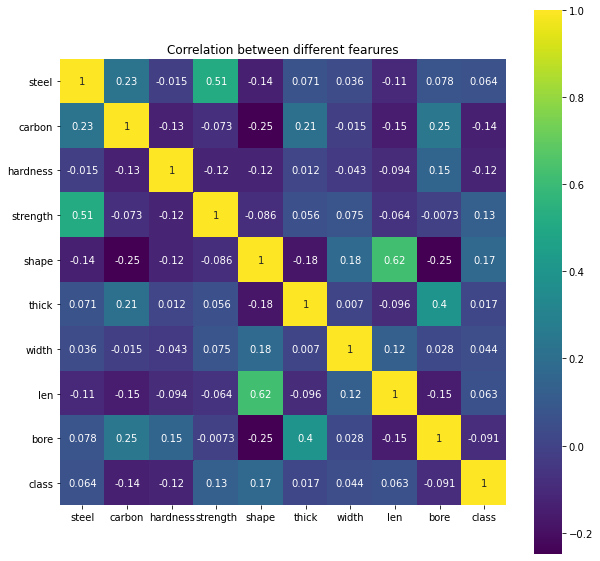

In [40]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

## Data Standardisation

In [41]:
#steel
#carbon
#hardness
#strength
#shape
#thick
#width
#len
#bore
X

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 6.100e+02, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.300e+03, 7.620e+02,
        0.000e+00],
       [1.000e+00, 0.000e+00, 6.000e+01, ..., 3.851e+02, 0.000e+00,
        0.000e+00],
       ...,
       [6.000e+00, 0.000e+00, 0.000e+00, ..., 1.500e+02, 7.620e+02,
        0.000e+00],
       [1.000e+00, 0.000e+00, 8.500e+01, ..., 2.000e+01, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 8.500e+01, ..., 6.100e+02, 0.000e+00,
        1.000e+00]])

In [42]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Computing the Covariance Matrix 

In [43]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std  - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)

In [44]:
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00123609  0.22890551 -0.01523683  0.51497699 -0.13922758  0.07125981
   0.03555392 -0.11061313  0.07817439]
 [ 0.22890551  1.00123609 -0.13322362 -0.07315535 -0.24890924  0.20576528
  -0.01537411 -0.14885585  0.24537135]
 [-0.01523683 -0.13322362  1.00123609 -0.12456026 -0.12317381  0.01217559
  -0.04345372 -0.093744    0.15216188]
 [ 0.51497699 -0.07315535 -0.12456026  1.00123609 -0.08563788  0.05590043
   0.07530506 -0.0643164  -0.00730114]
 [-0.13922758 -0.24890924 -0.12317381 -0.08563788  1.00123609 -0.17848319
   0.17844482  0.62411057 -0.24651545]
 [ 0.07125981  0.20576528  0.01217559  0.05590043 -0.17848319  1.00123609
   0.00697213 -0.09633386  0.39590179]
 [ 0.03555392 -0.01537411 -0.04345372  0.07530506  0.17844482  0.00697213
   1.00123609  0.12446495  0.0281846 ]
 [-0.11061313 -0.14885585 -0.093744   -0.0643164   0.62411057 -0.09633386
   0.12446495  1.00123609 -0.15366296]
 [ 0.07817439  0.24537135  0.15216188 -0.00730114 -0.24651545  0.39590179
   

Text(0.5, 1.0, 'Correlation between different features')

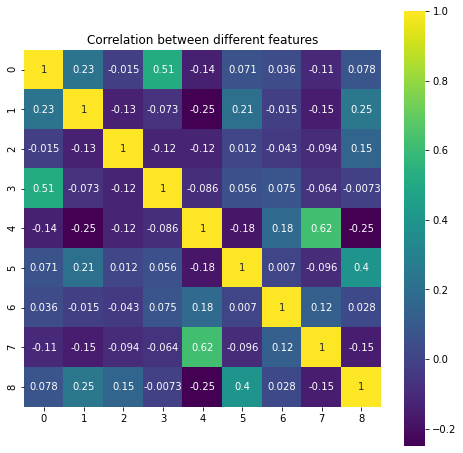

In [45]:
plt.figure(figsize=(8, 8))
sns.heatmap(cov_mat, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation between different features")

## Eigen decomposition of the covariance matrix


In [46]:
def simultaneous_orthogonalisation(A, tol=0.0001):
    Q, R = np.linalg.qr(A)
    previous = np.empty(shape=Q.shape)
    for i in range(100):
        previous[:] = Q
        X = A@Q
        Q, R = np.linalg.qr(X)
        if np.allclose(Q, previous, atol=tol):
            break
    return Q
eigen_vectors = simultaneous_orthogonalisation(cov_mat)

In [47]:
eigen_values, _ = np.linalg.eigh(cov_mat)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

X_reduced = np.dot(eigenvector_subset.transpose(),mean_vec.transpose()).transpose()
X_reduced

array([-1.92003654e-17, -1.16390014e-17])

#### With linalg:

In [48]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.29008552  0.58291245 -0.35187294 -0.50947864 -0.08498328 -0.0812845
  -0.10567272 -0.38759744 -0.13210821]
 [ 0.34836555  0.02717646  0.31189002  0.28296775  0.30609284 -0.14218381
   0.50704227 -0.56453745  0.10417915]
 [ 0.08851959 -0.31806939  0.16253423  0.15735665 -0.12362696 -0.25491055
  -0.73442931 -0.46544418 -0.05941334]
 [ 0.16728537  0.64741259  0.38134028  0.48616179 -0.18081794  0.11022416
  -0.21940354  0.23922766 -0.14452185]
 [-0.52467953  0.16499288  0.60531339 -0.42754624  0.30467304  0.01188229
  -0.05610015 -0.1197881  -0.1944875 ]
 [ 0.33627203 -0.04486811 -0.00971034 -0.07842077  0.49746584 -0.58287659
  -0.09334086  0.43763813 -0.30200472]
 [-0.10601941  0.24953171 -0.07958058  0.0267379   0.38449053 -0.09577767
  -0.26912712  0.05979462  0.82851354]
 [-0.45854006  0.15861265 -0.48374661  0.4484442   0.39728294  0.03417467
  -0.04751993 -0.21781006 -0.34751842]
 [ 0.38575269 -0.15001152  0.01515989 -0.09210674  0.45292564  0.7387965
  -0.24014

## Selecting Principal Components

In [49]:
#making a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x:x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.16869117270347
1.5122923897646279
1.2719246893871217
1.073712808133376
0.8834027727362976
0.8038414704381054
0.564747132098234
0.39115790682622964
0.34135450340079154


In [50]:
s = 0
for i in eig_pairs:
    s+=i[0]


In [51]:
for i in eig_pairs:
    print(f'{i[0]}-------> {i[0]*100/s}%')

2.16869117270347-------> 24.066819735488448%
1.5122923897646279-------> 16.782504023588263%
1.2719246893871217-------> 14.115049022142411%
1.073712808133376-------> 11.915413741836783%
0.8834027727362976-------> 9.80346835588018%
0.8038414704381054-------> 8.92054526178913%
0.564747132098234-------> 6.267221260184794%
0.39115790682622964-------> 4.340833287001645%
0.34135450340079154-------> 3.7881453120883464%


In [52]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

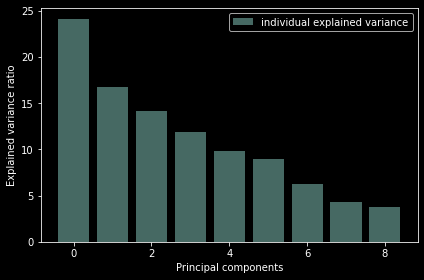

In [53]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(9), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Dropping the last two, since the other features contibutes to a good 90+% 

## Creating a feature matrix

In [54]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(9,1), 
                      eig_pairs[1][1].reshape(9,1),
                      eig_pairs[2][1].reshape(9,1),
                      eig_pairs[3][1].reshape(9,1),
                      eig_pairs[4][1].reshape(9,1),
                      eig_pairs[5][1].reshape(9,1),
                      eig_pairs[6][1].reshape(9,1),
                      
                    ))
matrix_w

array([[ 0.29008552,  0.58291245, -0.08498328, -0.10567272, -0.13210821,
        -0.38759744, -0.0812845 ],
       [ 0.34836555,  0.02717646,  0.30609284,  0.50704227,  0.10417915,
        -0.56453745, -0.14218381],
       [ 0.08851959, -0.31806939, -0.12362696, -0.73442931, -0.05941334,
        -0.46544418, -0.25491055],
       [ 0.16728537,  0.64741259, -0.18081794, -0.21940354, -0.14452185,
         0.23922766,  0.11022416],
       [-0.52467953,  0.16499288,  0.30467304, -0.05610015, -0.1944875 ,
        -0.1197881 ,  0.01188229],
       [ 0.33627203, -0.04486811,  0.49746584, -0.09334086, -0.30200472,
         0.43763813, -0.58287659],
       [-0.10601941,  0.24953171,  0.38449053, -0.26912712,  0.82851354,
         0.05979462, -0.09577767],
       [-0.45854006,  0.15861265,  0.39728294, -0.04751993, -0.34751842,
        -0.21781006,  0.03417467],
       [ 0.38575269, -0.15001152,  0.45292564, -0.24014537, -0.1050792 ,
         0.01745257,  0.7387965 ]])

In [55]:
Y = X_std.dot(matrix_w)
Y

array([[ 1.17148309, -0.97968372,  0.34074179, ..., -0.42576349,
         1.87689526, -1.27409875],
       [-1.20863922, -0.02905698,  0.351319  , ...,  1.32355626,
         0.40141039,  0.26343209],
       [ 1.52506394, -1.39157383, -0.46648236, ..., -1.00025177,
         0.21124983, -1.63386478],
       ...,
       [ 0.84760253,  2.04340527, -0.64771561, ..., -1.99180206,
        -1.20204308, -0.45630003],
       [ 0.78792064, -1.81328476, -2.30239589, ..., -0.98233322,
        -1.50901387, -0.20459305],
       [ 2.98375484, -2.00919624,  1.44272201, ..., -1.27483495,
         0.42122963, -0.88522069]])

In [56]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # covariance, function needs samples as columns
        cov = np.cov(X.T)

        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # store first n eigenvectors
        self.components = eigenvectors[0 : self.n_components]

    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

In [57]:
pca = PCA(6)
pca.fit(X)
X_projected = pca.transform(X)

In [58]:
print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

Shape of X: (810, 9)
Shape of transformed X: (810, 6)


In [67]:
target_data = df.loc[:, 'class']
df_data = pd.DataFrame(X_projected)

In [68]:
df_data

,0,1,2,3,4,5
0,-1280.313798,142.353278,-29.809187,-13.749370,-7.716327,0.905092
1,-499.386474,-525.998977,-43.887018,-11.957234,-6.850721,0.690203
2,-1286.656168,367.215183,-25.938380,45.369345,0.482599,0.119152
3,-1021.388449,504.692109,-21.456502,45.504570,0.840387,-0.059974
4,-1280.369746,142.444382,-31.171748,30.814502,-1.609682,-0.039627
...,...,...,...,...,...,...
805,-518.616066,163.511488,-26.433332,-12.874933,-6.708540,0.754461
806,-394.531749,-53.055965,-31.475264,-12.446846,-6.589922,0.756470
807,-531.436201,623.184160,-14.763920,-13.479403,-6.475801,-5.229498
808,-1296.862083,732.106948,-17.463969,69.641163,3.911440,0.015224


In [69]:
target_data

0      0
1      0
2      0
3      0
4      0
      ..
805    4
806    4
807    4
808    1
809    1
Name: class, Length: 810, dtype: int64

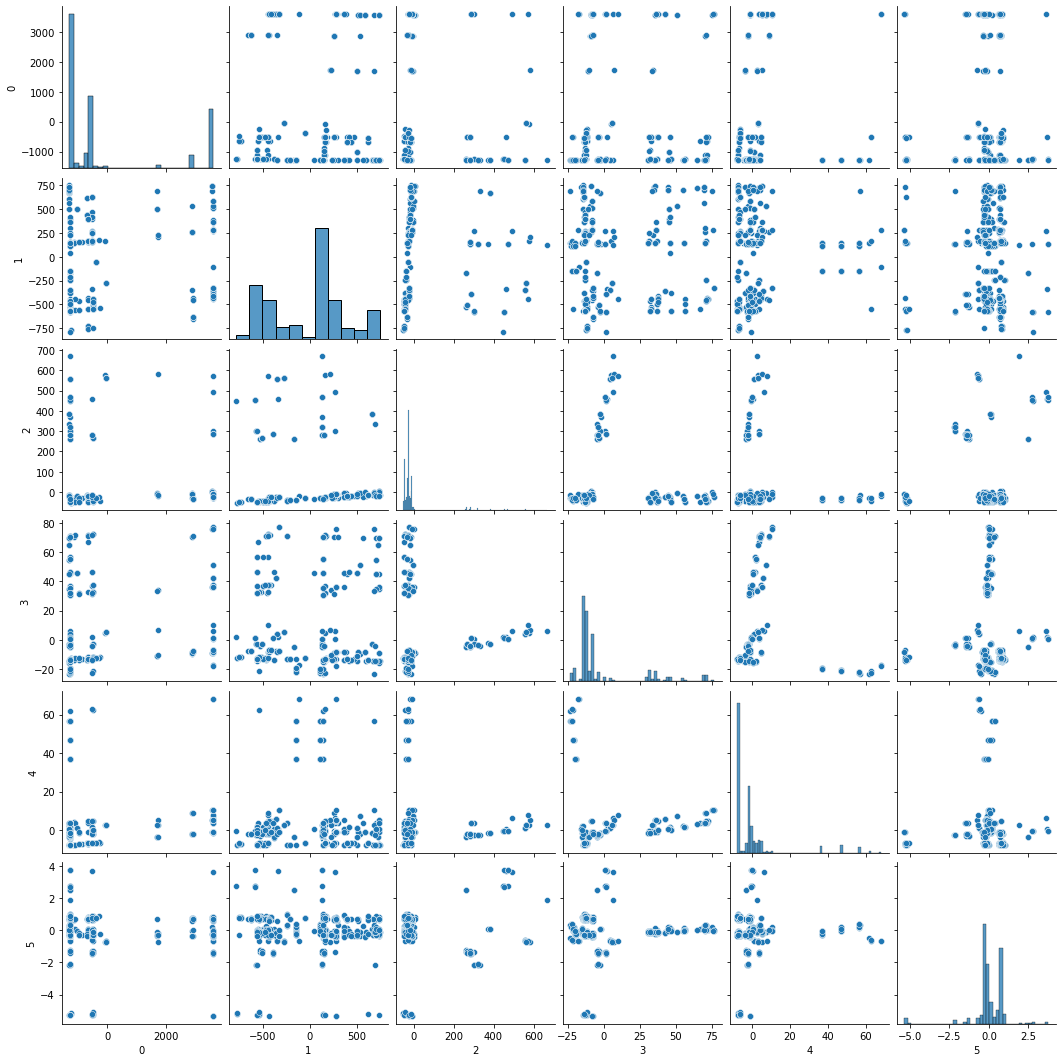

In [70]:
sns.pairplot(df_data)

In [71]:
X_train,X_test,y_train,y_test = train_test_split(df_data,target_data,train_size = 0.65,random_state=0)

## Choosing the first model on the new projected dataset

## Decision Tree Classifier

In [78]:
m1NewScore = cross_val_score(m1, X_train, y_train, cv=5)
print(m1NewScore)

[0.83962264 0.83809524 0.88571429 0.82857143 0.85714286]


In [79]:
y_pred = m1.fit(X_train, y_train).predict(X_test)
print(accuracy_score( y_test, y_pred) * 100 , "%")

86.97183098591549 %


In [80]:
print(f1_score(y_test, y_pred, average=None))

[0.91928251 0.93333333 0.8        0.46153846 0.6557377 ]


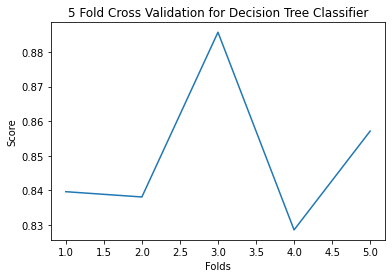

In [81]:
plt.title("5 Fold Cross Validation for Decision Tree Classifier") 
plt.xlabel("Folds") 
plt.ylabel("Score") 
plt.plot(fold, m1NewScore) 

## Gaussian Classifier

In [82]:
m2NewScore = cross_val_score(m2, X_train, y_train, cv=5)
print(m2NewScore)

[0.63207547 0.56190476 0.51428571 0.61904762 0.58095238]


In [83]:
y_pred = m2.fit(X_train, y_train).predict(X_test)
print(accuracy_score( y_test, y_pred) * 100 , "%")

57.3943661971831 %


In [84]:
print(f1_score(y_test, y_pred, average=None))

[0.68586387 0.63829787 0.28571429 0.28915663 0.14285714]


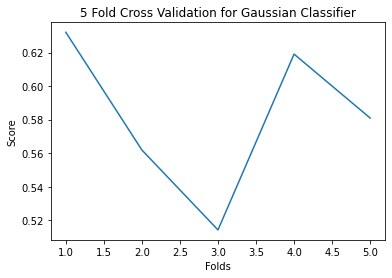

In [85]:
plt.title("5 Fold Cross Validation for Gaussian Classifier") 
plt.xlabel("Folds") 
plt.ylabel("Score") 
plt.plot(fold, m2NewScore) 

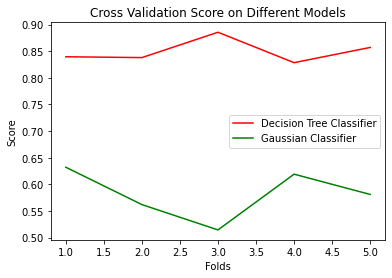

In [88]:
plt.plot(fold, m1NewScore, color='r', label='Decision Tree Classifier')
plt.plot(fold, m2NewScore, color='g', label='Gaussian Classifier')
plt.xlabel("Folds")
plt.ylabel("Score")
plt.title("Cross Validation Score on Different Models")
plt.legend()
plt.show()

# Question 2: Linear Discriminant Analysis

In [89]:
class ScratchLDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(SW).dot(SB)
        eigenvectors = simultaneous_orthogonalization(A)
        eigenvalues, _ = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)

In [93]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [94]:
new_X = df.iloc[:, 0:9].to_numpy()
new_y = df.loc[:, 'class'].to_numpy()

X_train_, X_test_, y_train_, y_test_ = train_test_split(new_X, new_y, test_size=0.35, shuffle=True)
from sklearn.decomposition import PCA
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis(n_components=2)
pca = PCA(2)

models = [dt, gnb]
tmp = []
result = []
for idx, model in enumerate(models):
    tmp_X = pca.fit_transform(X_train_)
    model.fit(tmp_X, y_train_)
    preds = model.predict(pca.transform(X_test_))
    acc = accuracy_score(y_test_, preds)
    tmp.append(acc)

    tmp_X = lda.fit_transform(X_train_, y_train_)
    model.fit(tmp_X, y_train_)
    preds = model.predict(lda.transform(X_test_))
    acc = accuracy_score(y_test_, preds)
    tmp.append(acc)

    result.append(tmp)
    tmp = []

result = np.array(result)
results = result.T
print(results)

[[0.83098592 0.54225352]
 [0.87323944 0.54225352]]


In [95]:
final_df = pd.DataFrame()
final_df['Decision Tree'] = results[:, 0] * 100 
final_df['Naive Bayes'] = results[:, 1] * 100

final_df.index = ['PCA', 'LDA']

final_df

,Decision Tree,Naive Bayes
PCA,83.098592,54.225352
LDA,87.323944,54.225352


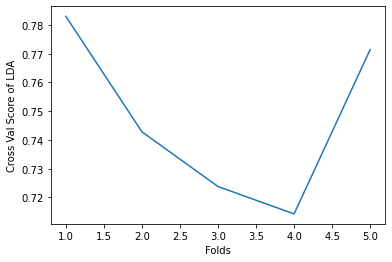

In [97]:
model = LinearDiscriminantAnalysis()
csv_scores = cross_val_score(model, X_train, y_train, cv=5)
plt.plot(range(1, 6), csv_scores)
plt.xlabel("Folds")
plt.ylabel("Cross Val Score of LDA")
plt.show()

In [100]:
from sklearn.metrics import plot_roc_curve 
X = df_data.iloc[:,:].to_numpy()
y = df.loc[:, 'class'].to_numpy()
print(np.unique(y))
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.65,random_state=0)
model = LinearDiscriminantAnalysis(n_components = 2)
model = model.fit(X_train, y_train)
plot_roc_curve(model,X_train,y_train)

[0 1 2 3 4]


ValueError: LinearDiscriminantAnalysis should be a binary classifier